# 都道府県データ解析(3章演習)
e-Stat人口推計より、都道府県5歳階級別人口データを利用して、  
円グラフ、棒グラフ、積み上げグラフ、散布図を描き、全体のデータを把握しなさい。  
https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200524&tstat=000000090001&cycle=7&year=20170&month=0&tclass1=000001011679  

In [1]:
#データのインポート
csv_data <- read.csv("prefecture.csv")

In [2]:
csv_data

X,都道府県名,総数,X0.4歳,X5.9,X10.14,X15.19,X20.24,X25.29,X30.34,⋯,X40.44,X45.49,X50.54,X55.59,X60.64,X65.69,X70.74,X75.79,X80.84,X85歳以上
1,北海道,5320,179,198,211,234,234,237,275,⋯,380,374,342,341,371,469,348,306,248,262
2,青森県,1278,42,46,52,60,49,50,61,⋯,84,86,82,90,97,115,84,76,67,66
3,岩手県,1255,43,48,53,58,47,52,61,⋯,83,81,78,86,93,108,78,74,67,73
4,宮城県,2323,87,94,99,111,123,121,133,⋯,168,159,143,147,160,188,128,114,97,103
5,秋田県,996,29,34,38,42,30,35,44,⋯,63,61,60,71,81,95,68,64,61,67
6,山形県,1102,39,43,48,52,40,45,55,⋯,70,68,66,75,82,96,67,63,59,71
7,福島県,1882,68,71,81,92,72,83,97,⋯,125,122,118,131,144,165,110,101,90,103
8,茨城県,2892,107,119,128,142,130,135,157,⋯,211,211,181,177,198,243,186,156,113,121
9,栃木県,1957,75,82,88,93,82,94,111,⋯,147,142,123,122,136,164,118,97,75,82
10,群馬県,1960,71,81,89,99,88,89,101,⋯,145,145,124,117,128,161,128,106,81,91


In [3]:
#グラフで用いるラベルを作成
labels=c("0-4歳","5-9歳","10-14歳","15-19歳","20-24歳","25-29歳","30-34歳","35-39歳","40-44歳","45-49歳","50-54歳","55-59歳","60-64歳","65-69歳","70-74歳","75-79歳","80-84歳","85歳以上")

#日本語の対応
par(family = "HiraKakuProN-W3")

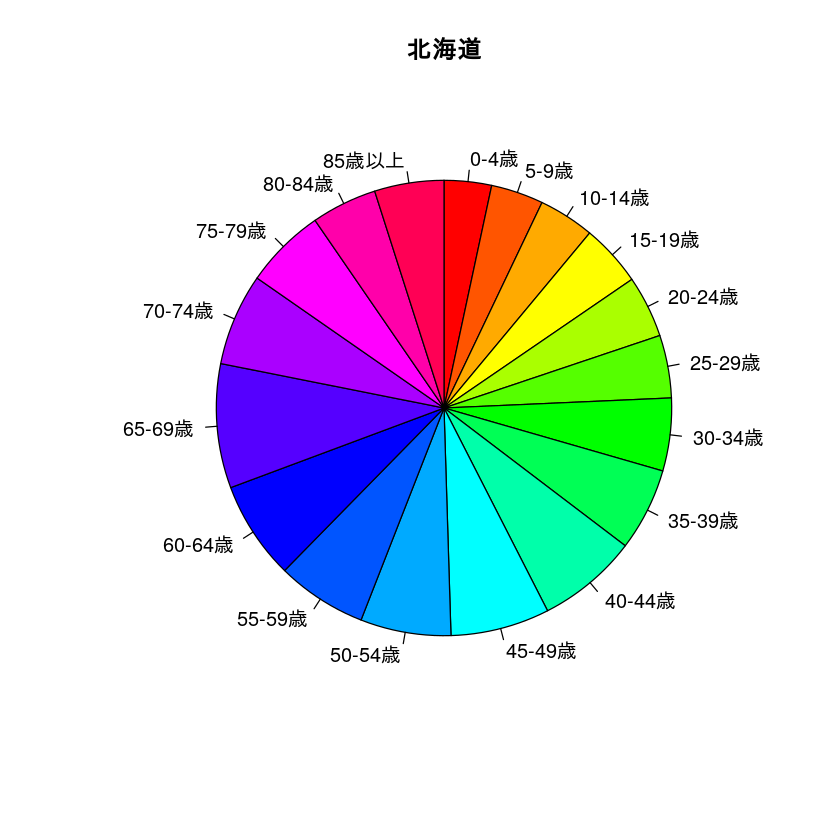

In [4]:
#円グラフ
index <- 1 #indexは行番号を指定=北海道
pie(as.integer(c(csv_data[index,4:21])),labels = labels, 
    main = csv_data[index,2],
    clockwise=TRUE, col = rainbow(18))

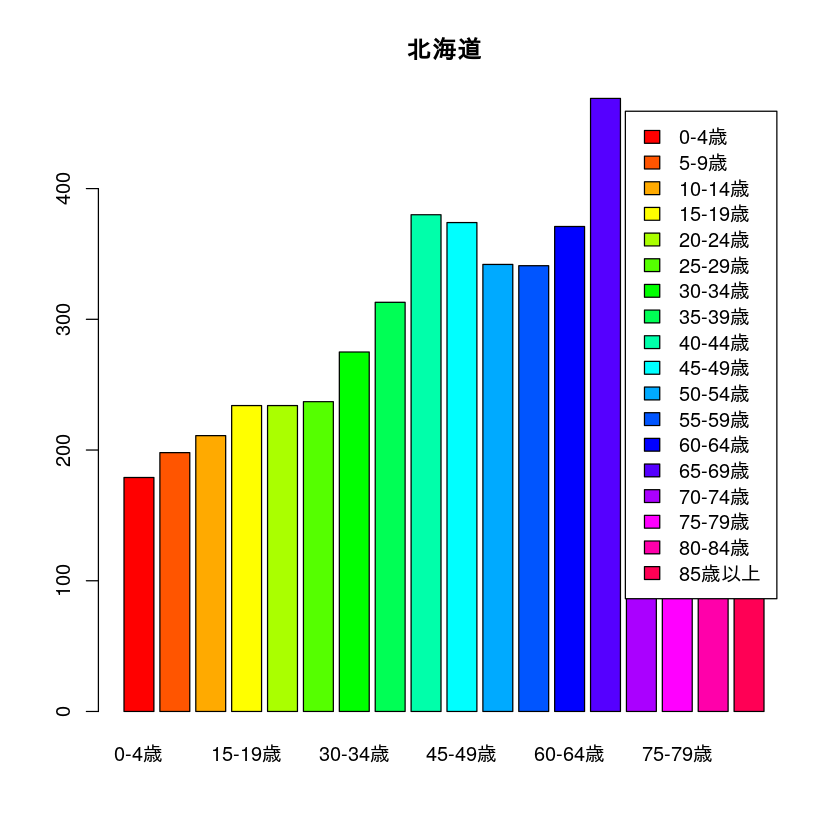

In [6]:
#棒グラフ
barplot(as.integer(c(csv_data[index,4:21])),legend = labels, 
    main = csv_data[index,2],
    names.arg = labels, col = rainbow(18))

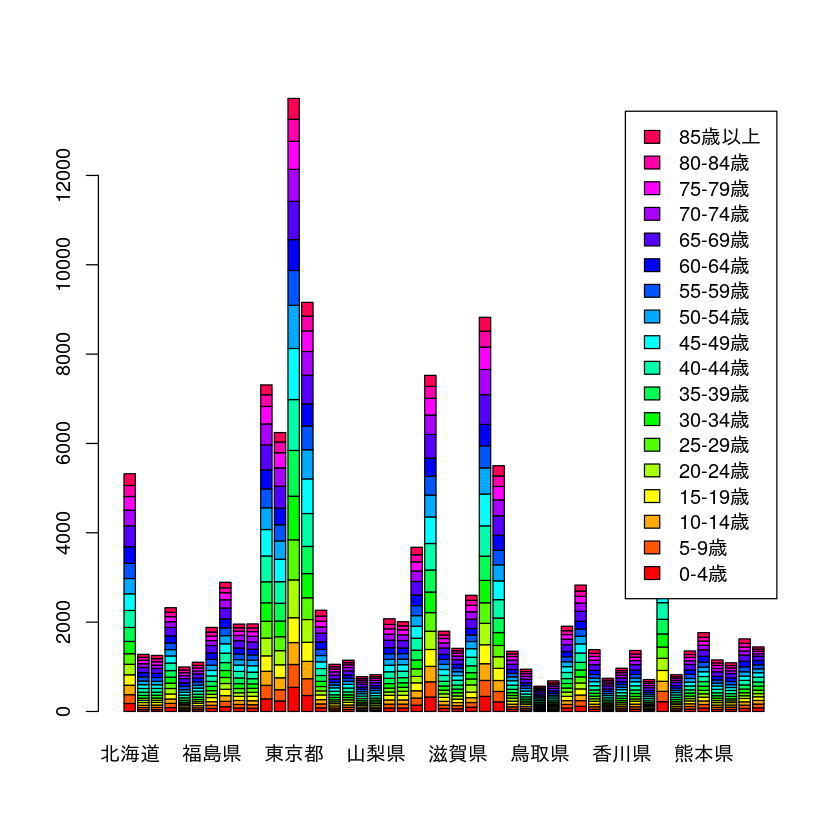

In [7]:
#積み上げグラフ
barplot(t(csv_data[,4:21]), legend = labels,
        col = rainbow(18), names.arg = csv_data[,2]) 

In [10]:
#ソートしたものを利用
das_data <- csv_data[order(csv_data$総数, decreasing = TRUE),]

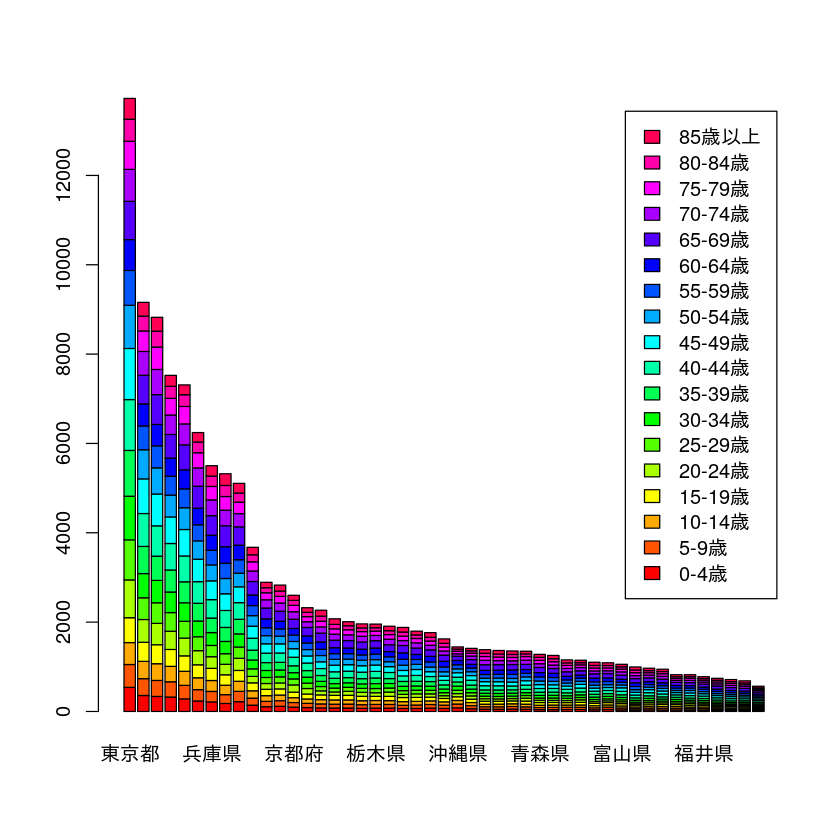

In [11]:
barplot(t(das_data[,4:21]), legend = labels,
        col = rainbow(18), names.arg = das_data[,2]) 

In [12]:
#散布図
#選択する年齢層のリストを作ります。
columnList <- c("総数", "X70.74歳","X75.79歳","X80.84歳","X85歳以上")

In [13]:
#70際以上の人数の和を求める
scatter_y <- csv_data[,18] + csv_data[,19] + csv_data[,20] + csv_data[,21]

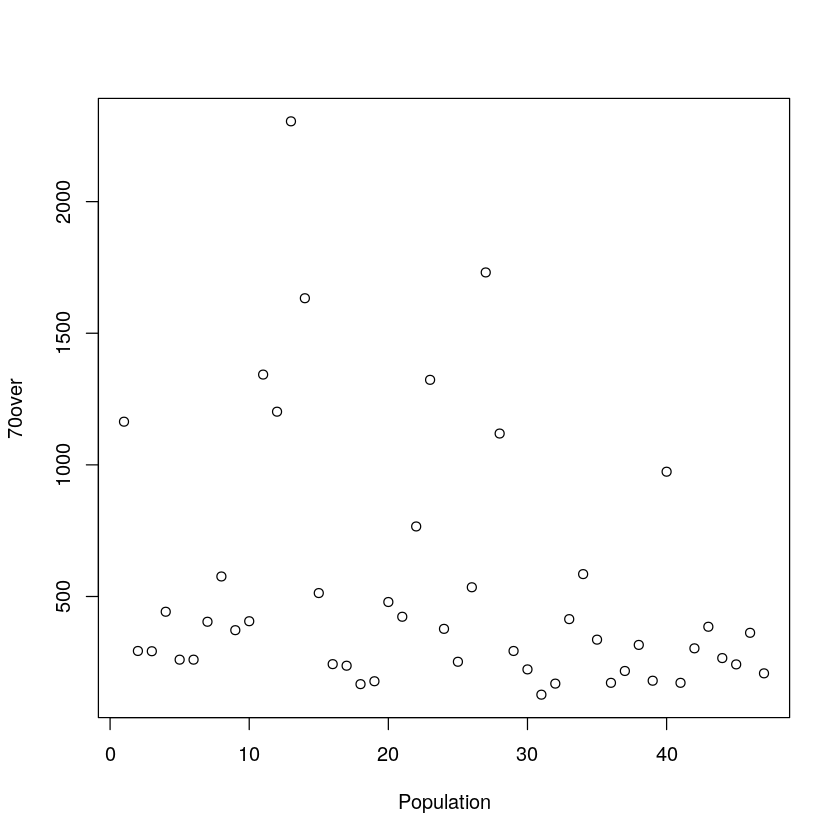

In [14]:
#プロット
plot(csv_data[,1],scatter_y,xlab = "Population",ylab = "70over")

In [17]:
#回帰直線を求める
result.lm <-lm(scatter_y ~ csv_data[,1])

In [18]:
#回帰直線の内容表示
summary(result.lm)


Call:
lm(formula = scatter_y ~ csv_data[, 1])

Residuals:
    Min      1Q  Median      3Q     Max 
-450.86 -283.29 -118.53   24.09 1667.34 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    756.616    140.214   5.396 2.43e-06 ***
csv_data[, 1]   -9.151      5.086  -1.799   0.0787 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 473 on 45 degrees of freedom
Multiple R-squared:  0.06711,	Adjusted R-squared:  0.04637 
F-statistic: 3.237 on 1 and 45 DF,  p-value: 0.0787


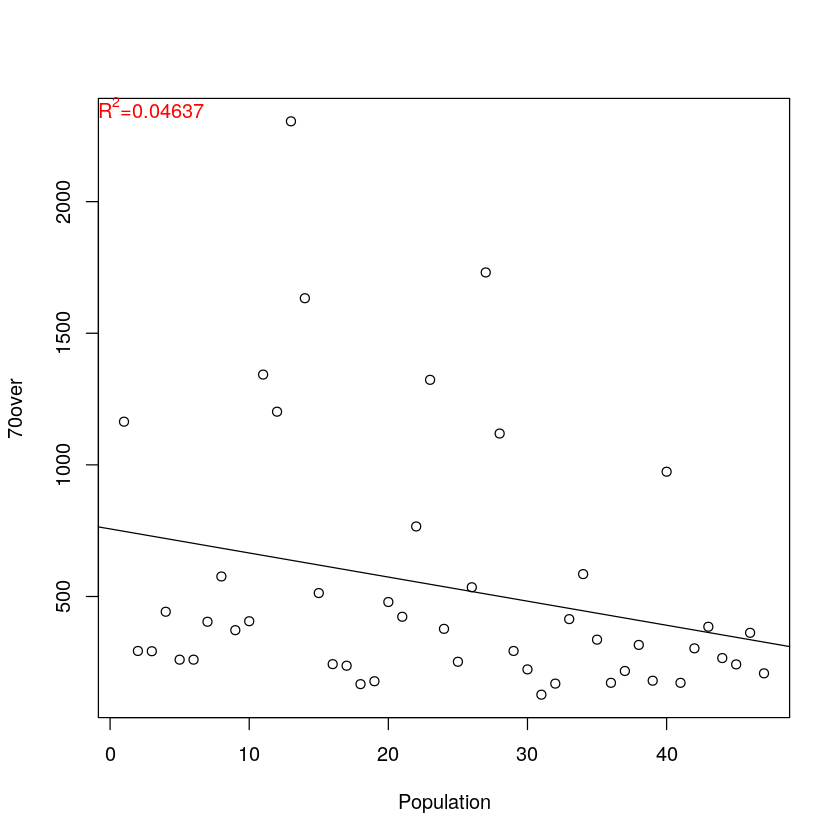

In [20]:
#プロット
plot(csv_data[,1],scatter_y,xlab = "Population",ylab = "70over")
#回帰直線を追加
abline(result.lm)
# R値を追加
mtext(substitute(paste(R^2,"=",text),list(text=round(summary(result.lm)$adj.r.squared,digits=5))),line=-1,col=2,adj=0)